In [1]:
!pip install pdf2docx 
# to convert .pdf to .docx file format
!pip install textract 
# extract the text from any type of file format
!pip install python-docx 
# used to extract text from docx file and use in phyton environment 
!pip install pyPDF2 
# used in working with docx file in phyton
!pip install python-docx pypiwin32
# used to convert .doc file to .docx file format 

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import docx2txt
import PyPDF2
from docx import document
from PyPDF2 import PdfReader
from docx import Document

## Converting file formats
### 1.Convert PDF to Docx file

In [3]:
from pdf2docx import Converter
import os

In [4]:
path_input = r'C:\Users\91866\Phyton\Project_Classification\Resumes\React JS'
path_output = r'C:\Users\91866\Phyton\Project_Classification\Resumes\React JS'

In [5]:
for file in os.listdir(path_input):
    if file.endswith('.pdf'):
        final = os.path.join(path_input, file)
        cv = Converter(final)
        basename = os.path.splitext(file)[0]
        print(basename)
        cv.convert(path_output + '/' + basename+'.docx', start=0, end=None)
        cv.close()

[INFO] Start to convert C:\Users\91866\Phyton\Project_Classification\Resumes\React JS\Reactjs Developer_Prabakaran_Musquare Technologies.pdf
[INFO] [1/4] Opening document...
[INFO] [2/4] Analyzing document...


Reactjs Developer_Prabakaran_Musquare Technologies


[INFO] [3/4] Parsing pages...
[INFO] (1/2) Page 1
[INFO] (2/2) Page 2
[INFO] [4/4] Creating pages...
[INFO] (1/2) Page 1
[INFO] (2/2) Page 2
[INFO] Terminated in 1.66s.


### 2.Convert .doc to .docx 

In [6]:
import win32com.client

def convert_doc_to_docx(doc_file):
    word = win32com.client.Dispatch("Word.Application")
    doc = word.Documents.Open(doc_file)
    docx_file = os.path.splitext(doc_file)[0] + ".docx"
    doc.SaveAs(docx_file, FileFormat=16)
    doc.Close()
    word.Quit()

def batch_convert_docs_to_docx(doc_folder):
    for root, dirs, files in os.walk(doc_folder):
        for file in files:
            if file.endswith(".doc"):
                doc_file = os.path.join(root, file)
                convert_doc_to_docx(doc_file)

# Specify the folder containing .doc files
doc_folder = r'C:\Users\91866\Phyton\Project_Classification\Resumes'

# Convert .doc files to .docx
batch_convert_docs_to_docx(doc_folder)


## Extracting the Text from dataset

In [7]:
os.listdir(r'C:\Users\91866\Phyton\Project_Classification\Resumes')

['Internship', 'Peoplesoft', 'React JS', 'SQL Developer', 'workday']

In [8]:
import textract

In [9]:
file_path1 = []
category1  = []
directory1 = r'C:\Users\91866\Phyton\Project_Classification\Resumes\Internship'
for i in os.listdir(directory1):
    if i.endswith('.docx'):
        os.path.join(directory1, i)
        file_path1.append((textract.process(os.path.join(directory1, i))).decode('utf-8'))
        category1.append('Internship')

In [10]:
data1 = pd.DataFrame(data = file_path1 , columns = ['Raw_Details'])
data1['Category1'] = category1
data1

,Raw_Details,Category1
0,Name: Ravali P \n\n\n\n ...,Internship
1,SUSOVAN BAG \n\nSeeking a challenging po...,Internship


In [11]:
file_path2 = []
category2  = []
directory2 = r'C:\Users\91866\Phyton\Project_Classification\Resumes\Peoplesoft'
for i in os.listdir(directory2):
    if i.endswith('.docx'):
        os.path.join(directory2, i)
        file_path2.append((textract.process(os.path.join(directory2, i))).decode('utf-8'))
        category2.append('Peoplesoft')

In [12]:
data2 = pd.DataFrame(data = file_path2 , columns = ['Raw_Details'])
data2['Category2'] = category2
data2

,Raw_Details,Category2
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft
1,G. Ananda Rayudu \n\n\t\t https://www.li...,Peoplesoft
2,PeopleSoft Database Administrator\n\n ...,Peoplesoft
3,Classification: Internal\n\nClassification: In...,Peoplesoft
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",Peoplesoft
5,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",Peoplesoft
6,PEOPLESOFT Administrator\n\n\n\n\n\nSRINIVAS.K...,Peoplesoft
7,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,Peoplesoft
8,Vinod Akkala ...,Peoplesoft
9,PeopleSoft Admin/PeopleSoft DBA\n\n\n\nGanesh ...,Peoplesoft


In [13]:
file_path3 = []
category3  = []
directory3 = r'C:\Users\91866\Phyton\Project_Classification\Resumes\React JS'
for i in os.listdir(directory3):
    if i.endswith('.docx'):
        os.path.join(directory3, i)
        file_path3.append((textract.process(os.path.join(directory3, i))).decode('utf-8'))
        category3.append('React JS')

In [14]:
data3 = pd.DataFrame(data = file_path3 , columns = ['Raw_Details'])
data3['Category3'] = category3
data3

,Raw_Details,Category3
0,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS
1,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS
2,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS
3,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS
4,FULLSTACK SOFTWARE DEVELOPER / WEB DEVELOPER\n...,React JS
5,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS
6,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS
7,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React JS
8,Maryala Vinay Reddy\n\n\n\n\tProfessional Summ...,React JS
9,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS


In [15]:
file_path4 = []
category4  = []
directory4 = r'C:\Users\91866\Phyton\Project_Classification\Resumes\SQL Developer'
for i in os.listdir(directory4):
    if i.endswith('.docx'):
        os.path.join(directory4, i)
        file_path4.append((textract.process(os.path.join(directory4, i))).decode('utf-8'))
        category4.append('SQL Developer')

In [16]:
data4 = pd.DataFrame(data = file_path4 , columns = ['Raw_Details'])
data4['Category4'] = category4
data4

,Raw_Details,Category4
0,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer
1,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,SQL Developer
2,BUDDHA VAMSI ...,SQL Developer
3,KAMBALLA PRADEEP ...,SQL Developer
4, Hyderabad\n\n\nNazeer Basha\n\nSQL and Power...,SQL Developer
5,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,SQL Developer
6,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL Developer
7,SQL SERVER DEVELOPER\n\n\n\n\n\nPriyanka L ...,SQL Developer
8,SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...,SQL Developer
9,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...,SQL Developer


In [17]:
file_path5 = []
category5  = []
directory5 = r'C:\Users\91866\Phyton\Project_Classification\Resumes\workday'
for i in os.listdir(directory5):
    if i.endswith('.docx'):
        os.path.join(directory5, i)
        file_path5.append((textract.process(os.path.join(directory5, i))).decode('utf-8'))
        category5.append('workday')

In [18]:
data5 = pd.DataFrame(data = file_path5 , columns = ['Raw_Details'])
data5['Category5'] = category5
data5

,Raw_Details,Category5
0,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,workday
1,Name : Gopi Krishna Reddy\n\n\t\t ...,workday
2,Hari Krishna M\n\n\n\n\n\nSummary:\n\nA result...,workday
3,Harikrishna Akula ...,workday
4,HIMA.MENDU\n\n\t \n\n\n\nCareer Objective\n\n...,workday
5,G Himaja\n\n ...,workday
6,Name:\tJ. Sumanth Royal.\n\n\t\n\nPROFESSIONAL...,workday
7,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,workday
8,Madeeswar A\n\n\t\n\n\t\t\n\n\t\t\tPROFILE SUM...,workday
9,Mooraboyina Guravaiah\n\nWorkday Integration S...,workday


## Combining the Dataset

In [19]:
resume_data = pd.concat([data1,data2, data3, data4,data5], ignore_index = True)
resume_data.head()

,Raw_Details,Category1,Category2,Category3,Category4,Category5
0,Name: Ravali P \n\n\n\n ...,Internship,NaN,NaN,NaN,NaN
1,SUSOVAN BAG \n\nSeeking a challenging po...,Internship,NaN,NaN,NaN,NaN
2,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,NaN,Peoplesoft,NaN,NaN,NaN
3,G. Ananda Rayudu \n\n\t\t https://www.li...,NaN,Peoplesoft,NaN,NaN,NaN
4,PeopleSoft Database Administrator\n\n ...,NaN,Peoplesoft,NaN,NaN,NaN


In [20]:
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Raw_Details  79 non-null     object
 1   Category1    2 non-null      object
 2   Category2    20 non-null     object
 3   Category3    22 non-null     object
 4   Category4    14 non-null     object
 5   Category5    21 non-null     object
dtypes: object(6)
memory usage: 3.8+ KB


In [21]:
resume_data['Category'] = category1 + category2 + category3 + category4 + category5
resume_data.head()

,Raw_Details,Category1,Category2,Category3,Category4,Category5,Category
0,Name: Ravali P \n\n\n\n ...,Internship,NaN,NaN,NaN,NaN,Internship
1,SUSOVAN BAG \n\nSeeking a challenging po...,Internship,NaN,NaN,NaN,NaN,Internship
2,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,NaN,Peoplesoft,NaN,NaN,NaN,Peoplesoft
3,G. Ananda Rayudu \n\n\t\t https://www.li...,NaN,Peoplesoft,NaN,NaN,NaN,Peoplesoft
4,PeopleSoft Database Administrator\n\n ...,NaN,Peoplesoft,NaN,NaN,NaN,Peoplesoft


In [22]:
resume_data.drop(['Category1', 'Category2', 'Category3', 'Category4','Category5'], axis = 1, inplace = True)
resume_data = resume_data[["Raw_Details","Category" ]]

In [23]:
resume_data.head()

,Raw_Details,Category
0,Name: Ravali P \n\n\n\n ...,Internship
1,SUSOVAN BAG \n\nSeeking a challenging po...,Internship
2,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft
3,G. Ananda Rayudu \n\n\t\t https://www.li...,Peoplesoft
4,PeopleSoft Database Administrator\n\n ...,Peoplesoft


In [24]:
resume_data["Raw_Details"][3]

'G. Ananda Rayudu \n\n\t\t       https://www.linkedin.com/in/anandgudapati\t\n\n\n\n\n\n\n\n\n\n\n\n\n\n\t\n\n\n\nProfile Summary:\t\t\t\t\t\t\t\t\t\t\n\n7+ years of experience in implementing, upgrading, and supporting PeopleSoft database administration including Human Capital Management (HCM), Financials, Campus Solutions and Portal IHUB\n\nExpertise in installation, configuration, setup, security and management of the PeopleSoft Internet Architecture PIA environment.\n\nIn-depth experience in analysis, planning, development, and implementation stages, including load testing, quality assurance, and tuning.\n\n\tGained extensive exposure in deploying PeopleSoft Environments.\n\n\tExperienced in Troubleshooting PeopleSoft Components.\n\nSkilled with the capability to analyse & interpret unique problems with a combination of training experience & logical thinking to find the right solutions\n\n\n\nCore Competencies:\t\t\t\t\t\t\t\t\t\t\t  \n\n\n\nPeopleSoft Implementation. \n\nTroublesh

### Save to CSV file

In [25]:
resume_data.to_csv('Raw_resume.csv',index=False)

In [26]:
resume_data=pd.read_csv('Raw_resume.csv')
resume_data.head()

,Raw_Details,Category
0,Name: Ravali P \n\n\n\n ...,Internship
1,SUSOVAN BAG \n\nSeeking a challenging po...,Internship
2,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft
3,G. Ananda Rayudu \n\n\t\t https://www.li...,Peoplesoft
4,PeopleSoft Database Administrator\n\n ...,Peoplesoft


In [27]:
resume_data.isnull().sum()

Raw_Details    0
Category       0
dtype: int64

In [28]:
resume_data.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
74    False
75    False
76    False
77    False
78    False
Length: 79, dtype: bool

## Data Understanding

### 1.Word_count in each resume

In [29]:
resume_data['Word_Count'] = resume_data['Raw_Details'].apply(lambda x: len(str(x).split(" ")))
resume_data[['Raw_Details','Word_Count']].head()

,Raw_Details,Word_Count
0,Name: Ravali P \n\n\n\n ...,1795
1,SUSOVAN BAG \n\nSeeking a challenging po...,533
2,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,1023
3,G. Ananda Rayudu \n\n\t\t https://www.li...,1441
4,PeopleSoft Database Administrator\n\n ...,1346


### 2.Stopwords in each resume

In [30]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
resume_data['Stopwords'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x in stop]))
resume_data[['Raw_Details','Stopwords']].head()

,Raw_Details,Stopwords
0,Name: Ravali P \n\n\n\n ...,179
1,SUSOVAN BAG \n\nSeeking a challenging po...,39
2,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,190
3,G. Ananda Rayudu \n\n\t\t https://www.li...,186
4,PeopleSoft Database Administrator\n\n ...,177


In [31]:
resume_data.head()

,Raw_Details,Category,Word_Count,Stopwords
0,Name: Ravali P \n\n\n\n ...,Internship,1795,179
1,SUSOVAN BAG \n\nSeeking a challenging po...,Internship,533,39
2,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft,1023,190
3,G. Ananda Rayudu \n\n\t\t https://www.li...,Peoplesoft,1441,186
4,PeopleSoft Database Administrator\n\n ...,Peoplesoft,1346,177


## Text Pre-processing and EDA

### 1.Tokenization

In [32]:
import re
from nltk.tokenize import RegexpTokenizer

In [33]:
def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]

    return " ".join(filtered_words)

In [34]:
resume_data = pd.read_csv('Raw_resume.csv')
resume_data['Resume_Details'] = resume_data.Raw_Details.apply(lambda x: preprocess(x))
resume_data.head()

,Raw_Details,Category,Resume_Details
0,Name: Ravali P \n\n\n\n ...,Internship,name ravali curriculum vitae specialization co...
1,SUSOVAN BAG \n\nSeeking a challenging po...,Internship,susovan bag seeking challenging position field...
2,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft,anubhav kumar singh core competencies scriptin...
3,G. Ananda Rayudu \n\n\t\t https://www.li...,Peoplesoft,ananda rayudu profile summary years experience...
4,PeopleSoft Database Administrator\n\n ...,Peoplesoft,peoplesoft database administrator gangareddy p...


In [35]:
resume_data.drop(['Raw_Details'],axis=1,inplace=True)
resume_data.head()

,Category,Resume_Details
0,Internship,name ravali curriculum vitae specialization co...
1,Internship,susovan bag seeking challenging position field...
2,Peoplesoft,anubhav kumar singh core competencies scriptin...
3,Peoplesoft,ananda rayudu profile summary years experience...
4,Peoplesoft,peoplesoft database administrator gangareddy p...


In [36]:
# Save this to a new csv file
resume_data.to_csv('Cleaned_Resumes.csv',index=False)
resume_data.head()

,Category,Resume_Details
0,Internship,name ravali curriculum vitae specialization co...
1,Internship,susovan bag seeking challenging position field...
2,Peoplesoft,anubhav kumar singh core competencies scriptin...
3,Peoplesoft,ananda rayudu profile summary years experience...
4,Peoplesoft,peoplesoft database administrator gangareddy p...


### Top 20 words used in Resume

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pylab as pylab
from matplotlib import rcParams

In [38]:
countvec = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(1,2))
ngrams = countvec.fit_transform(resume_data['Resume_Details']) # matrix of ngrams
count_values = ngrams.toarray().sum(axis=0) # count frequency of ngrams

vocab = countvec.vocabulary_ # list of ngrams
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k, i in vocab.items()],
                               reverse=True)).rename(columns={0: 'Frequency', 1:'Unigram_Bigram'})

In [39]:
df_ngram.head(10)

,Frequency,Unigram_Bigram
0,598,experience
1,453,peoplesoft
2,431,workday
3,418,application
4,395,using
5,359,server
6,332,data
7,326,reports
8,326,project
9,280,sql


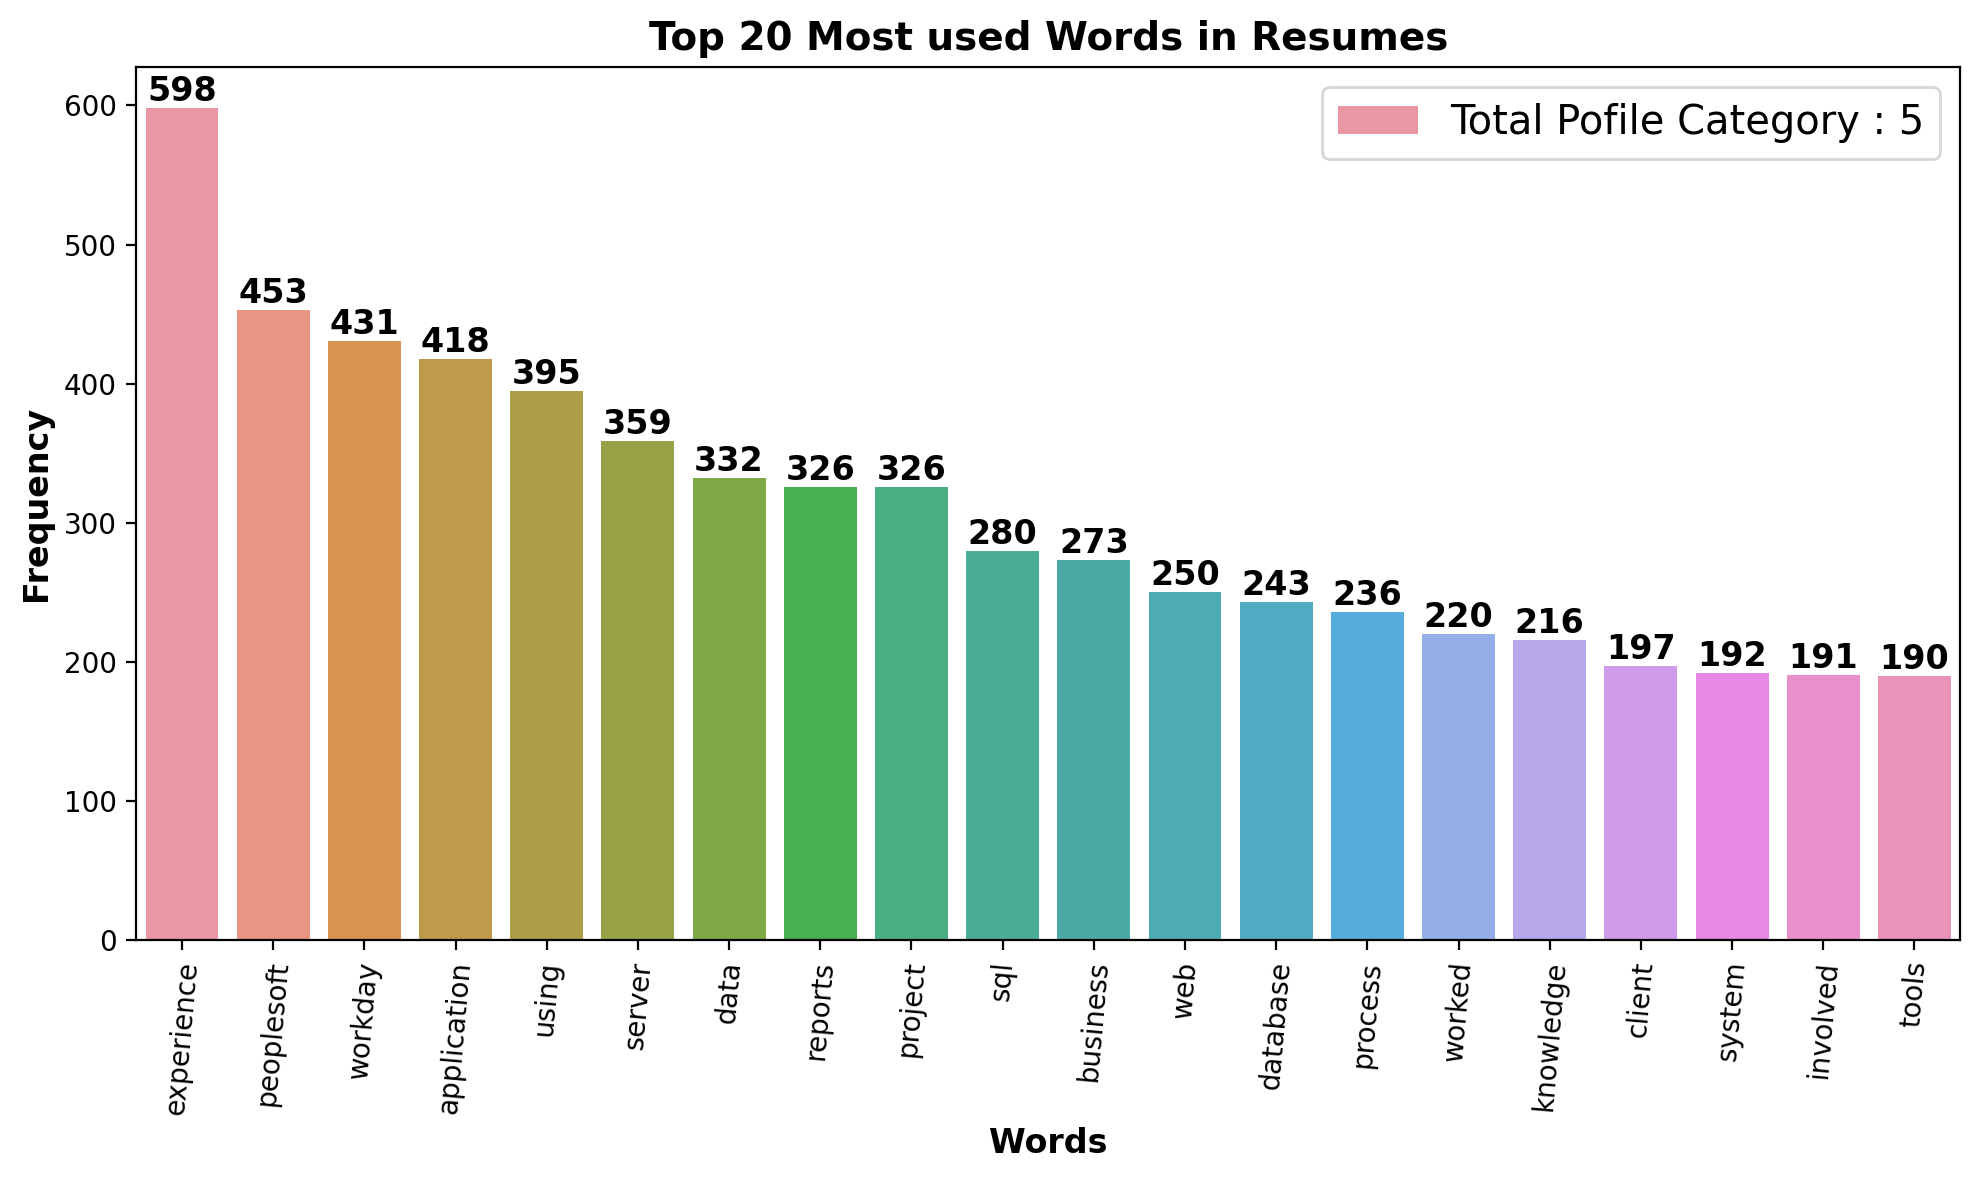

In [40]:
fig, axe = plt.subplots(1,1, figsize=(10,6), dpi=200)
ax = sns.barplot(x=df_ngram['Unigram_Bigram'].head(20), y=df_ngram.Frequency.head(20), data=resume_data, ax = axe,
            label='Total Pofile Category : {}'.format(len(resume_data.Category.unique())))

axe.set_xlabel('Words', size=12,fontweight= 'bold')
axe.set_ylabel('Frequency', size=12, fontweight= 'bold')
plt.xticks(rotation = 85)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 20 Most used Words in Resumes', fontsize= 14, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

### Word_Cloud

In [41]:
from wordcloud import WordCloud,STOPWORDS

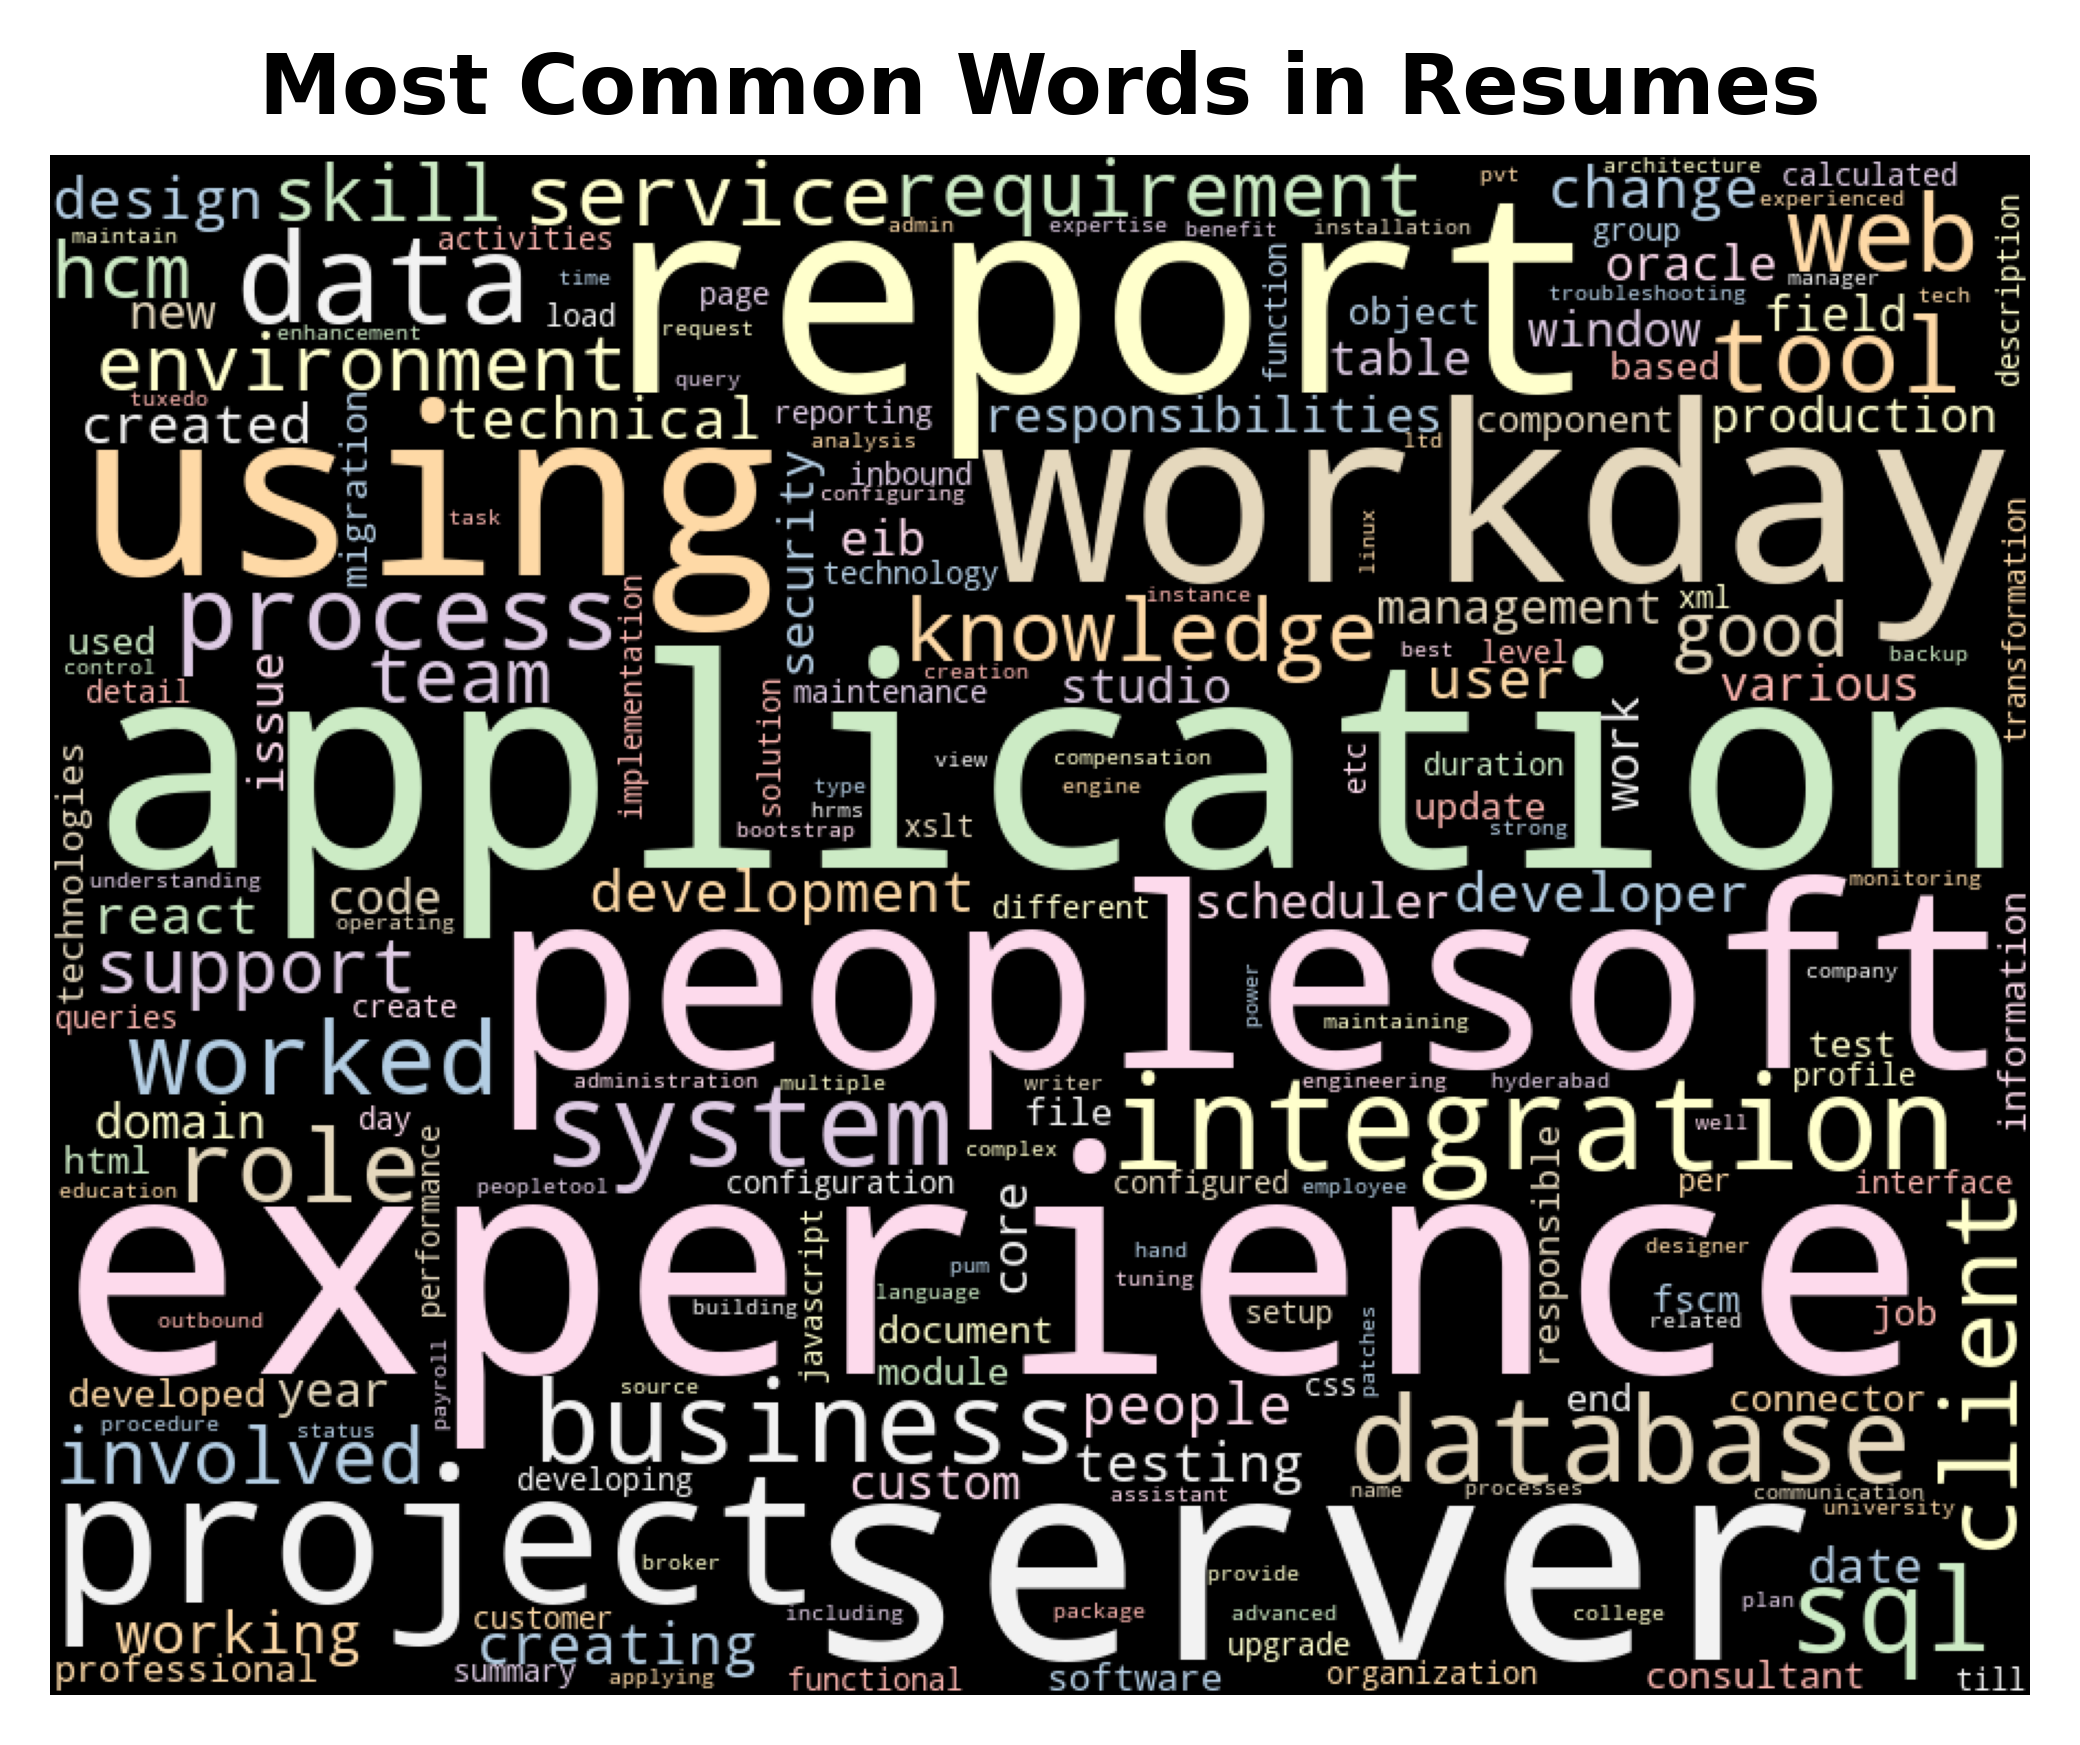

In [42]:
text = " ".join(cat for cat in resume_data.Resume_Details) # Creating the text variable

word_cloud = WordCloud(width=900, height=700, random_state=10, background_color="black", 
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(8,4), dpi=500) # Display the generated Word Cloud
plt.title('Most Common Words in Resumes', fontsize= 12, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")

word_cloud.to_file(r'C:\Users\91866\Phyton\Project_Classification\Word_Cloud.png')
plt.show()

### 2. Named Entity Recognition (NER)

In [43]:
import nltk
nltk.download('punkt')
import string

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91866\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [44]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resume_data['Resume_Details'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = preprocess(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(25)
print(mostcommon)

[('experience', 598), ('peoplesoft', 453), ('workday', 431), ('application', 418), ('using', 395), ('server', 359), ('data', 332), ('project', 326), ('reports', 326), ('sql', 280), ('business', 273), ('web', 250), ('database', 243), ('process', 236), ('worked', 220), ('knowledge', 216), ('client', 197), ('system', 192), ('involved', 191), ('tools', 190), ('integrations', 189), ('integration', 183), ('hcm', 182), ('like', 180), ('support', 178)]


### 3.Part of Speech (POS) Tagging

In [45]:
!pip install -U spacy
!python -m spacy download en_core_web_lg

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


     ---------------------------------------- 0.0/587.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/587.7 MB 1.9 MB/s eta 0:05:07
     ---------------------------------------- 0.1/587.7 MB 1.7 MB/s eta 0:05:45
     ---------------------------------------- 0.3/587.7 MB 2.1 MB/s eta 0:04:36
     ---------------------------------------- 0.3/587.7 MB 1.9 MB/s eta 0:05:09
     ---------------------------------------- 0.5/587.7 MB 2.2 MB/s eta 0:04:22
     ---------------------------------------- 0.7/587.7 MB 2.5 MB/s eta 0:03:59
     ---------------------------------------- 0.9/587.7 MB 2.8 MB/s eta 0:03:31
     ---------------------------------------- 1.0/587.7 MB 2.9 MB/s eta 0:03:24
     ---------------------------------------- 1.3/587.7 MB 3.1 MB/s eta 0:03:10
     ---------------------------------------- 1.5/587.7 MB 3.3 MB/s eta 0:03:01
     ---------------------------------------- 1.6/587.7 MB 3.3 MB/s eta 0:02:59
     ---------------------------------------- 1

ERROR: Wheel 'en-core-web-lg' located at C:\Users\91866\AppData\Local\Temp\pip-unpack-7um25dto\en_core_web_lg-3.7.1-py3-none-any.whl is invalid.


In [46]:
import spacy

In [47]:
nlp = spacy.load('en_core_web_lg')

one_block = cleanedSentences[0:2000]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style= 'ent', jupyter= True)

## Model Building

In [48]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data.head()

,Category,Resume_Details
0,Internship,name ravali curriculum vitae specialization co...
1,Internship,susovan bag seeking challenging position field...
2,Peoplesoft,anubhav kumar singh core competencies scriptin...
3,Peoplesoft,ananda rayudu profile summary years experience...
4,Peoplesoft,peoplesoft database administrator gangareddy p...


### 1. Label-Encoding

In [49]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
resume_data["LebelEncoding"]=Encoder.fit_transform(resume_data ["Category"])

resume_data

,Category,Resume_Details,LebelEncoding
0,Internship,name ravali curriculum vitae specialization co...,0
1,Internship,susovan bag seeking challenging position field...,0
2,Peoplesoft,anubhav kumar singh core competencies scriptin...,1
3,Peoplesoft,ananda rayudu profile summary years experience...,1
4,Peoplesoft,peoplesoft database administrator gangareddy p...,1
...,...,...,...
74,workday,workday integration consultant name sri krishn...,4
75,workday,srikanth workday hcm consultant seeking suitab...,4
76,workday,workday hcm fcm name kumar role workday consul...,4
77,workday,venkateswarlu workday consultant professional ...,4


In [50]:
resume_data.describe()

,LebelEncoding
count,79.000000
mean,2.405063
std,1.203829
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,4.000000


### 2. Train_Test Split

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x = resume_data['Resume_Details'].values
y = resume_data['Category'].values

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25,stratify=y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((59,), (20,), (59,), (20,))

### 3.TF-IDF Vectorization

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [55]:
tfidf_vector = TfidfVectorizer(sublinear_tf=True,stop_words='english')

In [56]:
x_train= tfidf_vector.fit_transform(x_train)
x_test=tfidf_vector.transform(x_test)

In [57]:
x_train.shape,x_test.shape

((59, 3756), (20, 3756))

### 4.1 KNN Classifier

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import f1_score, precision_score, recall_score

In [59]:
model_knn = KNeighborsClassifier(n_neighbors=41)
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=41)

In [60]:
y_pred = model_knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_knn.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_knn.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_knn,classification_report(y_test, y_pred)))
nb_score = model_knn.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_knn = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_knn = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_knn = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_knn = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.61
Accuracy of  test set    : 0.55
Classification report for classifier KNeighborsClassifier(n_neighbors=41):
               precision    recall  f1-score   support

   Peoplesoft       1.00      0.20      0.33         5
     React JS       1.00      0.83      0.91         6
SQL Developer       0.00      0.00      0.00         4
      workday       0.36      1.00      0.53         5

     accuracy                           0.55        20
    macro avg       0.59      0.51      0.44        20
 weighted avg       0.64      0.55      0.49        20




### 4.2 Decision Tree Classifier 

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
model_DT = DecisionTreeClassifier(criterion='gini')
model_DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [63]:
y_pred = model_DT.predict(x_test)
accuracy_DT = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_DT.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_DT.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_DT,classification_report(y_test, y_pred)))
nb_score = model_DT.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_DT = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_DT= round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_DT = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_DT = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier DecisionTreeClassifier():
               precision    recall  f1-score   support

   Peoplesoft       1.00      1.00      1.00         5
     React JS       1.00      1.00      1.00         6
SQL Developer       1.00      1.00      1.00         4
      workday       1.00      1.00      1.00         5

     accuracy                           1.00        20
    macro avg       1.00      1.00      1.00        20
 weighted avg       1.00      1.00      1.00        20




### 4.3 Random Forest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
model_RF = RandomForestClassifier(n_estimators=200)
model_RF.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200)

In [66]:
y_pred = model_RF.predict(x_test)
accuracy_RF = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_RF.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_RF.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_RF,classification_report(y_test, y_pred)))
nb_score = model_RF.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_RF = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_RF = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_RF = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_RF = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier RandomForestClassifier(n_estimators=200):
               precision    recall  f1-score   support

   Peoplesoft       1.00      1.00      1.00         5
     React JS       1.00      1.00      1.00         6
SQL Developer       1.00      1.00      1.00         4
      workday       1.00      1.00      1.00         5

     accuracy                           1.00        20
    macro avg       1.00      1.00      1.00        20
 weighted avg       1.00      1.00      1.00        20




### 4.4 Support Vector Machine (SVM) Classifier

In [67]:
from sklearn.svm import SVC

In [68]:
model_svm = SVC()
model_svm.fit(x_train, y_train)

SVC()

In [69]:
y_pred = model_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_svm.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_svm.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_svm,classification_report(y_test, y_pred)))
nb_score = model_svm.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_svm = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_svm = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_svm = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_svm = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.98
Accuracy of  test set    : 1.00
Classification report for classifier SVC():
               precision    recall  f1-score   support

   Peoplesoft       1.00      1.00      1.00         5
     React JS       1.00      1.00      1.00         6
SQL Developer       1.00      1.00      1.00         4
      workday       1.00      1.00      1.00         5

     accuracy                           1.00        20
    macro avg       1.00      1.00      1.00        20
 weighted avg       1.00      1.00      1.00        20




### 4.5 Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
model_lgr = LogisticRegression()
model_lgr.fit(x_train, y_train)

LogisticRegression()

In [72]:
y_pred = model_lgr.predict(x_test)
accuracy_lgr = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_lgr.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_lgr.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_lgr,classification_report(y_test, y_pred)))
nb_score = model_lgr.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_lgr = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_lgr = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_lgr = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_lgr = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.97
Accuracy of  test set    : 1.00
Classification report for classifier LogisticRegression():
               precision    recall  f1-score   support

   Peoplesoft       1.00      1.00      1.00         5
     React JS       1.00      1.00      1.00         6
SQL Developer       1.00      1.00      1.00         4
      workday       1.00      1.00      1.00         5

     accuracy                           1.00        20
    macro avg       1.00      1.00      1.00        20
 weighted avg       1.00      1.00      1.00        20




### 5. Model Evaluation 

In [73]:
Evaluation = {"Models":["KNN Classifier","DecisionTree Classifier","RandomForest Classifier","SVM Classifier",
                        "Logistic Regression"],\
            "Train_Accuracy(%)":[model_knn.score(x_train, y_train),model_DT.score(x_train, y_train),model_RF.score(x_train, y_train),model_svm.score(x_train, y_train),model_lgr.score(x_train, y_train)],
            "Test_Accuracy(%)":[accuracy_knn,accuracy_DT,accuracy_RF,accuracy_svm,accuracy_lgr],\
            "Precision(%)":[precision_knn,precision_DT,precision_RF,precision_svm,precision_lgr],\
            "Recall(%)":[recall_knn,recall_DT,recall_RF,recall_svm,recall_lgr],\
            "F1-Score(%)":[f1_knn,f1_DT,f1_RF,f1_svm,f1_lgr]}
table = pd.DataFrame(Evaluation)
table

,Models,Train_Accuracy(%),Test_Accuracy(%),Precision(%),Recall(%),F1-Score(%)
0,KNN Classifier,0.610169,0.55,0.59,0.51,0.44
1,DecisionTree Classifier,1.000000,1.00,1.00,1.00,1.00
2,RandomForest Classifier,1.000000,1.00,1.00,1.00,1.00
3,SVM Classifier,0.983051,1.00,1.00,1.00,1.00
4,Logistic Regression,0.966102,1.00,1.00,1.00,1.00


In [74]:
model_names = ["KNN","DecisionTree","RandomForest ","SVM ", "Logistic Regression"]
Test_accuracies = [accuracy_knn*100,accuracy_DT*100,accuracy_RF*100,accuracy_svm*100,accuracy_lgr*100]
Train_accuracies=[model_knn.score(x_train, y_train)*100,model_DT.score(x_train, y_train)*100,
                  model_RF.score(x_train, y_train)*100,model_svm.score(x_train, y_train)*100,
                  model_lgr.score(x_train, y_train)*100]

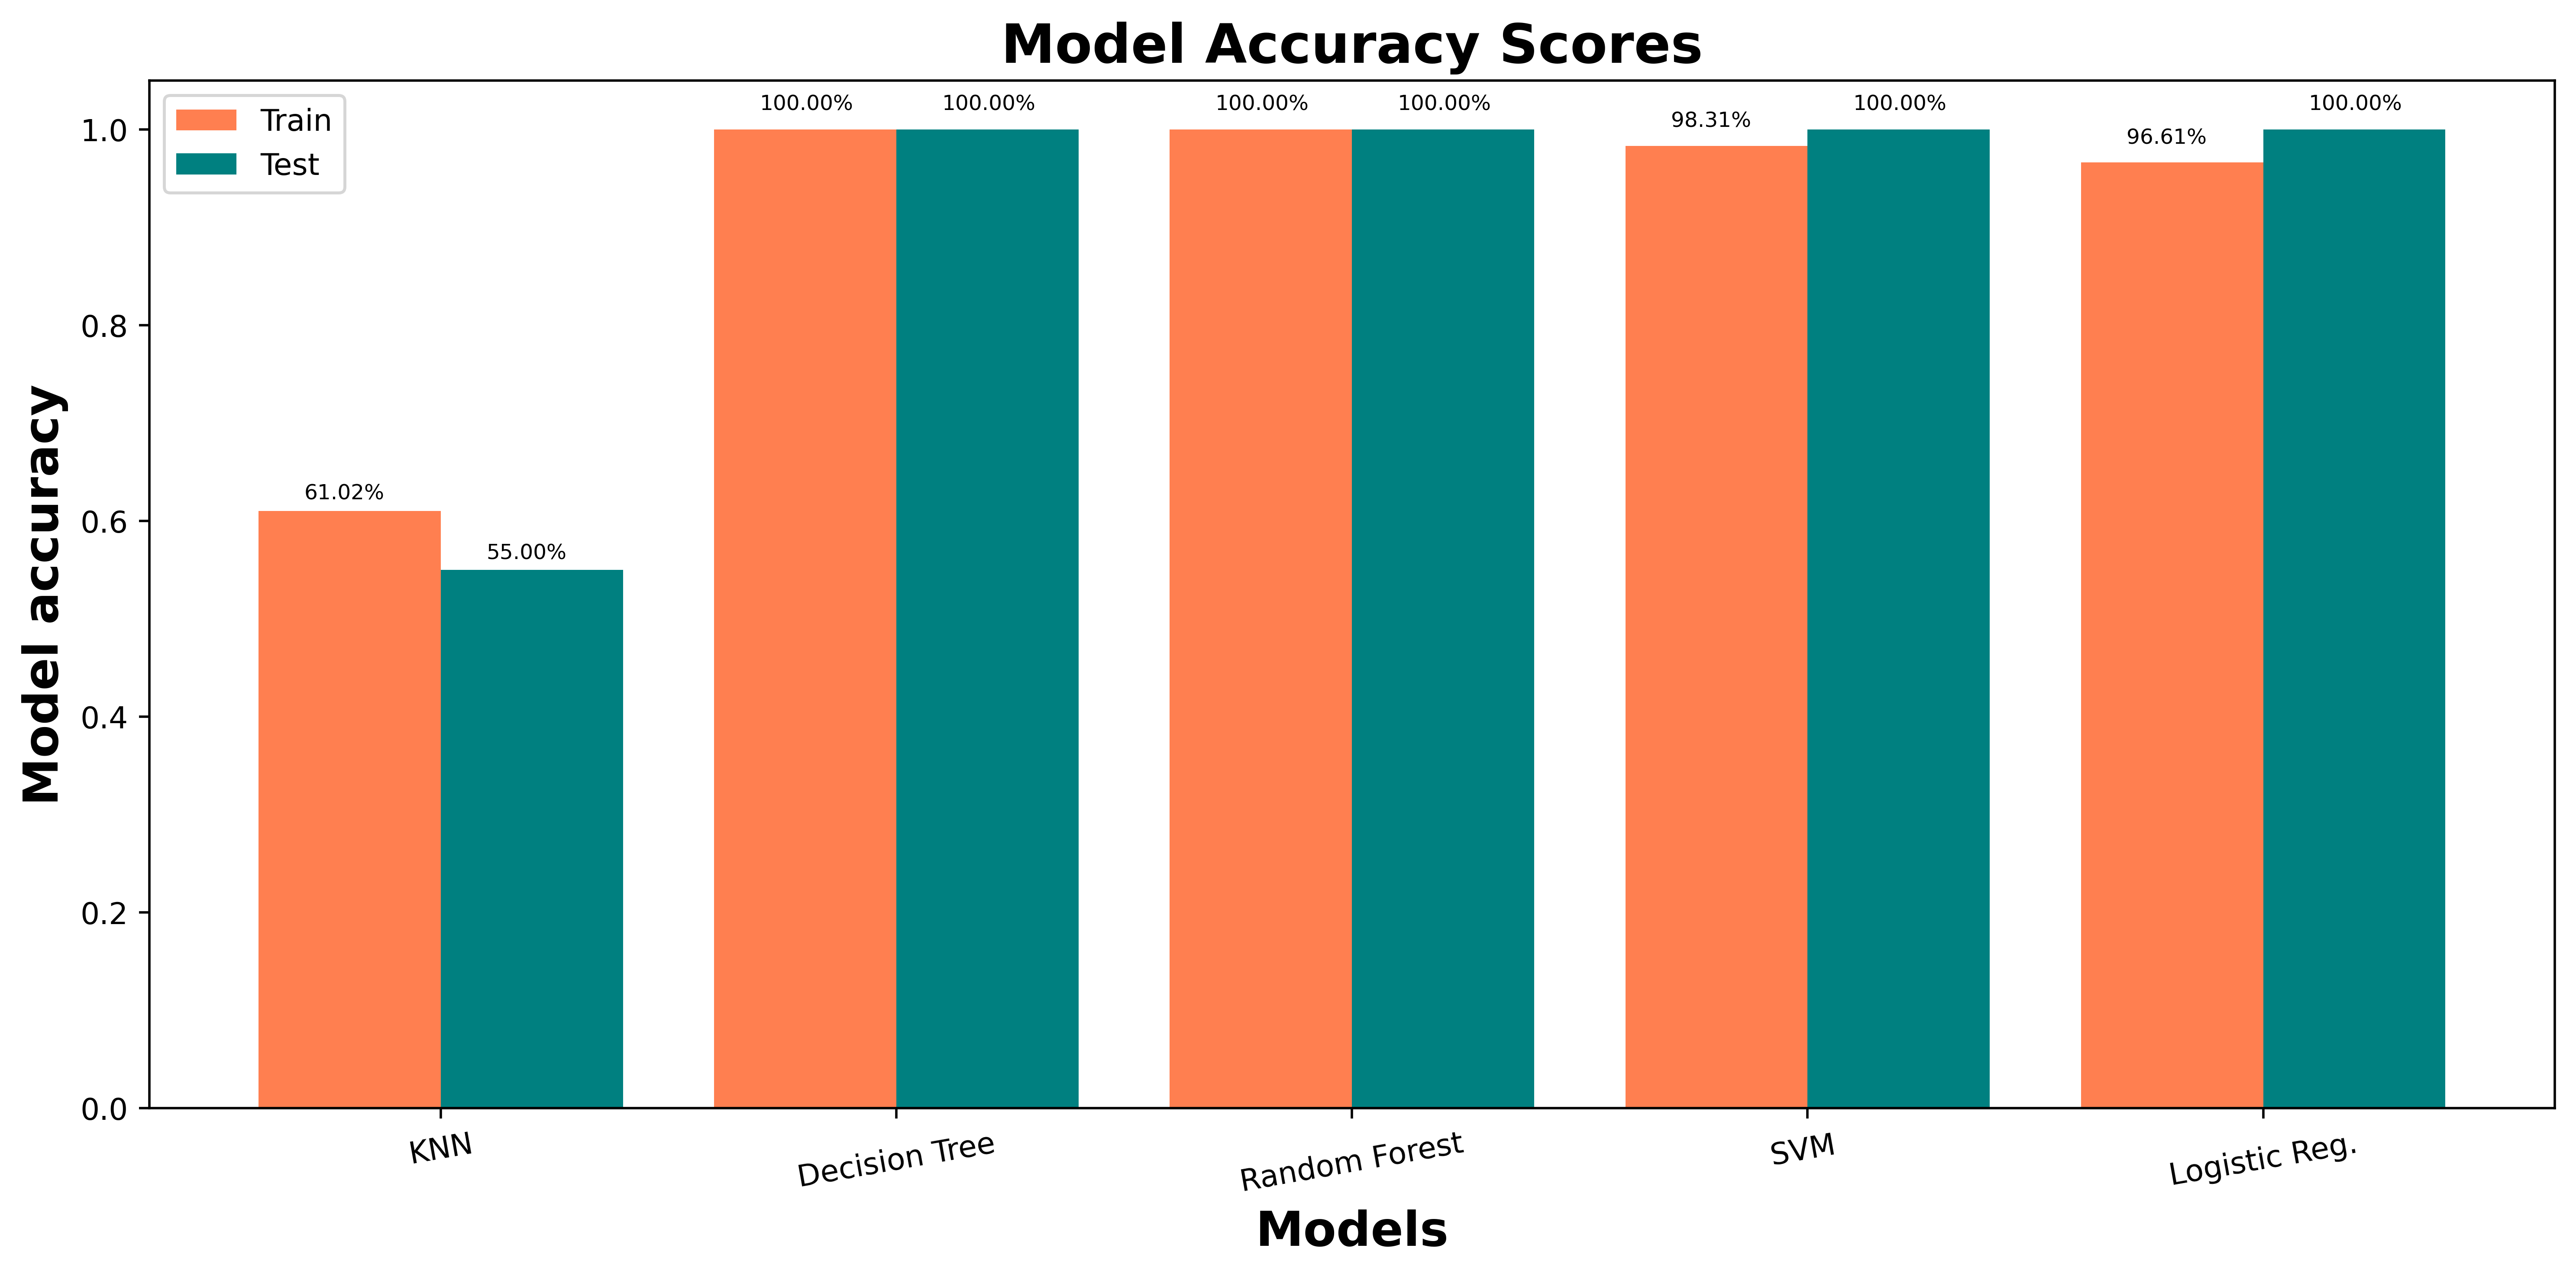

In [75]:
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=500)
x_pos = np.arange(len(table))
model_names = [ "KNN", "Decision Tree", "Random Forest", "SVM ", "Logistic Reg."]

bar1 = plt.bar(x_pos - 0.2, table['Train_Accuracy(%)'], width=0.4, label='Train', color= "Coral")
bar2 = plt.bar(x_pos + 0.2, table['Test_Accuracy(%)'], width=0.4, label='Test', color= "Teal")
plt.xticks(x_pos, model_names)

plt.xlabel("Models", fontsize = 16, fontweight = 'bold')
plt.ylabel("Model accuracy", fontsize = 16, fontweight = 'bold')
plt.title("Model Accuracy Scores", fontsize = 18, fontweight = 'bold')
plt.xticks(rotation = 10)
plt.legend()

for i, bar in enumerate(bar1):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02, 
             s = '{:.2f}%'.format(Train_accuracies[i]), fontsize = 7)
    
for i, bar in enumerate(bar2):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02, 
             s = '{:.2f}%'.format(Test_accuracies[i]), fontsize = 7)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

In [78]:
# Above all models, we have finalized Decision Tree model for Model Building and Deployment
import pickle
from pickle import dump
model = 'modelDT.pkl'
dump(model_DT,open(model,'wb'))

In [79]:
vec = 'vector.pkl'
pickle.dump(tfidf_vector,open(vec,'wb'))